# **Podstawy Sztucznej Inteligencji - sieci neuronowe.**

Data oddania projektu: **08.05.2024 r.**

Numer grupy projektowej: **1**

Imię i nazwisko: **Weronika Bednarz**, **Izabela Bereżnicka**

Temat projektu: **Predykcja cen używanych samochodów.**

**<h2>1. Opis problemu i danych.</h2>**

Dane dla projektu "Predykcja cen używanych samochodów." gromadzą informacje dotyczące pojazdów dostępnych na polskim rynku.

Zawierają one różne cechy i detale, które mogą znacząco wpływać na ich wartość, takie jak: nazwa, rok, cena sprzedaży, liczna przejechanych kilometrów, paliwo, typ sprzedawcy, skrzynia biegów, właściciel.

Analiza cen używanych samochodów może być bardzo pomocna w różnych kontekstach, na przykład przy ustalaniu wartości rynkowej pojazdów, przewidywaniu cen, podejmowaniu decyzji dotyczących inwestycji oraz analizie trendów na rynku pojazdów używanych.

Link wykorzystanego zbioru danych:

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv


**Zaimportowane biblioteki:**

In [ ]:
import pandas as pd                                         # do manipulacji i analizy danych
import numpy as np                                          # zapewnia wsparcie dla operacji na dużych tablicach i macierzach
import matplotlib.pyplot as plt                             # umożliwia tworzenie wykresów i wizualizacji danych
import seaborn as sns                                       # narzędzie do wizualizacji danych, które uzupełnia funkcjonalność Matplotlib
import os                                                   # umożliwia interakcję z systemem operacyjnym, taką jak dostęp do plików i katalogów
import warnings                                             # pozwala kontrolować ostrzeżenia wyświetlane przez interpreter Pythona
import plotly.express as px                                 # do tworzenia interaktywnych wizualizacji danych
import tensorflow as tf                                     # do tworzenia i szkolenia modeli uczenia maszynowego

from PIL import Image                                       # do manipulacji obrazkami
from google.colab import files                              # moduł, który umożliwia interakcję z plikami w Google Colab.                                     #
from tensorflow.keras.models import Sequential              # klasa, która pozwala na tworzenie sekwencyjnych modeli sieci neuronowych
from tensorflow.keras.layers import Dense, Dropout          # warstwy, używane do budowy modeli sieci neuronowych
from sklearn.model_selection import train_test_split        # funkcja, która dzieli dane na zbiory treningowe i testowe.
from sklearn.preprocessing import StandardScaler            # normalizuje cechy poprzez usunięcie średniej i skalowanie do jednostkowej wariancji, do standaryzacji danych
from sklearn.metrics import r2_score                        # funkcja, która oblicza współczynnik determinacji R^2, do oceny wydajności modelu

**Załadowanie oraz wyświetlenie danych:**

In [ ]:
uploadedFile = files.upload()

Saving car_data.csv to car_data.csv


In [ ]:
# Wczytuje plik csv i zapisuje jego zawartość do zmiennej data
data = pd.read_csv('car_data.csv')

In [ ]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Ilość wczytanych rekordów: 8128

Zmienne z podziałem na jakościowe i ilościowe.


In [ ]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Ilość zmiennych: 13
*   name - nazwa samochodu,
*   year - rok zakupu samochodu,
*   selling_price - cena sprzedaży,
*   km_driven -liczba przejechanych kilometrów,
*   fuel - rodzaj paliwa samochodu,
*   seller_type - typ sprzedawcy, informuje, czy samochód jest sprzedawany przez osobę fizyczną czy dealera,
*   transmission - skrzynia biegów (automatyczna/ręczna),
*   owner - który to właścicel samochodu,
*   mileage - przebieg/zasięg, ile kilometrów można przejechać za litr paliwa [kmpl],
*   engine - pojemność silnika samochodu [CC],
*   max_power - maksymalna moc [bhp],
*   torque - moment obrotowy,
*   seats - liczba siedzeń

Zmienne ilościowe: year, selling_price, km_driven, mileage, engine, max_power, torque, seats

Zmienne jakościowe: name, fuel, seller_type, transmission, owner

**Podstawowe statystyki zbioru danych:**

- **count**: Liczba niepustych wartości w każdej kolumnie.

- **mean**: Średnia wartość dla każdej kolumny.

- **std**: Odchylenie standardowe, czyli miara rozproszenia danych od średniej.

- **min**: Najmniejsza wartość w każdej kolumnie.

- **25%**: Dolny kwartyl, czyli wartość, poniżej której znajduje się 25% obserwacji.

- **50%**: Mediana, czyli wartość środkowa, pomiędzy najmniejszą a największą wartością.

- **75%**: Górny kwartyl, czyli wartość, poniżej której znajduje się 75% obserwacji.

- **max**: Największa wartość w każdej kolumnie.

In [ ]:
# Zwraca podsumowanie statystyczne danych, podsumowanie obejmuje różne statystyki opisowe dla kolumn zawierających dane numeryczne
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


**<h2>2. Obróbka Danych.</h2>**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# Wykonuje zliczenie wartości brakujących w poszczególnych kolumnach ramki
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
# Usuwa wszystkie wiersze, które zawierają przynajmniej jedną wartość null z ramki
# inplace=False -> zwróci nową ramkę danych z usuniętymi wierszami, oryginalną zostawi bez zmian
data.dropna(inplace=True)

In [ ]:
# Zlicza zduplikowane wiersze w ramce danych
data.duplicated().sum()

1189

In [ ]:
data = data.drop_duplicates()

In [ ]:
# Usuwa kolumnę 'torque' z 'data' i zapisuje zmienioną ramkę danych z usuniętą kolumną 'torque' z powrotem do zmiennej 'data',
# argument inplace=True oznacza, że zmiany są wykonywane bezpośrednio na oryginalnej ramce danych, a nie tworzy się nowej kopii ramki danych
data.drop(columns=['torque'], inplace=True)

<ipython-input-12-3dac715f2ace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['torque'], inplace=True)


In [ ]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [ ]:
# Rozdziela łańcuchy tekstowe w kolumnach na podstawie spacji i zapisuje tylko pierwszy element (indeks 0) rozdzielenego łańcucha z powrotem do kolumny,
# działa to jak podzielenie ciągu znaków na słowa i zapisanie pierwszego słowa jako wartość w kolumnie.
data['mileage'] = data['mileage'].str.split(expand=True)[0]
data['engine'] = data['engine'].str.split(expand=True)[0]
data['max_power'] = data['max_power'].str.split(expand=True)[0]

<ipython-input-14-6d31bd4e6790>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage'] = data['mileage'].str.split(expand=True)[0]
<ipython-input-14-6d31bd4e6790>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine'] = data['engine'].str.split(expand=True)[0]
<ipython-input-14-6d31bd4e6790>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0


In [ ]:
# Konwertuje wartości w kolumnie na typ danych zmiennoprzecinkowy (float) i liczby całkowite (int)
data['mileage'] = data['mileage'].astype(float)
data['engine'] = data['engine'].astype(int)
data['max_power'] = data['max_power'].astype(float)
data['seats'] = data['seats'].astype(int)

<ipython-input-16-0add6b2d9811>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage'] = data['mileage'].astype(float)
<ipython-input-16-0add6b2d9811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine'] = data['engine'].astype(int)
<ipython-input-16-0add6b2d9811>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
# Konwersja typu danych z float na int
data['mileage'] = data['mileage'].astype(int)
data['max_power'] = data['max_power'].astype(int)

<ipython-input-17-7bdc1f590831>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage'] = data['mileage'].astype(int)
<ipython-input-17-7bdc1f590831>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['max_power'] = data['max_power'].astype(int)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6717 non-null   object
 1   year           6717 non-null   int64 
 2   selling_price  6717 non-null   int64 
 3   km_driven      6717 non-null   int64 
 4   fuel           6717 non-null   object
 5   seller_type    6717 non-null   object
 6   transmission   6717 non-null   object
 7   owner          6717 non-null   object
 8   mileage        6717 non-null   int64 
 9   engine         6717 non-null   int64 
 10  max_power      6717 non-null   int64 
 11  seats          6717 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 682.2+ KB


In [ ]:
# Ponownie wyświetla statystyki z przekonwertowanymi danymi numerycznymi
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.022331,1430.985857,87.462855,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.068770,493.469198,31.697291,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.000000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.000000,1197.000000,67.000000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.000000,1248.000000,81.000000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.000000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [ ]:
# Zwraca rozmiar tabeli - pozostałą po obróbce liczbę wierszy i kolumn
data.shape

(6717, 12)

Wyświetlenie rodzajów paliwa dla sprzedawanych samochodów

In [ ]:
data['fuel'].value_counts()

fuel
Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: count, dtype: int64

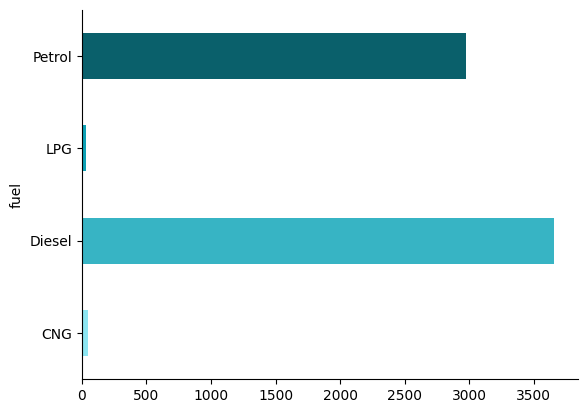

In [ ]:
# @title Zestawienie rodzajów paliw

# Definicja niestandardowej palety kolorów
custom_palette = ['#8de6f2', '#37b4c4', '#0da1b5', '#0a606b']

# Wykres grupowany i wybór palety kolorów
data.groupby('fuel').size().plot(kind='barh', color=custom_palette)

# Ukrycie niektórych osi
plt.gca().spines[['top', 'right',]].set_visible(False)

# Wyświetlenie wykresu
plt.show()

Na podstawie powyższego wykresu można zauważyć, że najwięcej samochodów, porusza się na paliwie typu Diesel i Petrol - około 3000 samochodów.

Wyświetlenie typów sprzedawców dla sprzedawanych samochodów

In [ ]:
data['seller_type'].value_counts()

seller_type
Individual          6024
Dealer               666
Trustmark Dealer      27
Name: count, dtype: int64

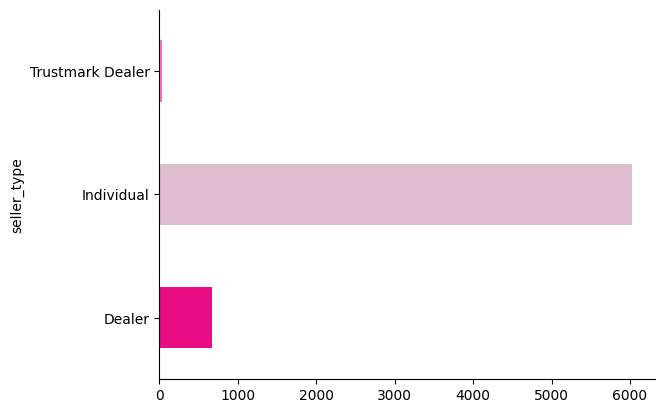

In [ ]:
# @title Zestawienie typów sprzedawców

# Definicja niestandardowej palety kolorów
custom_palette = ['#e80c85', '#debdcf', '#ff70bf']

# Wykres grupowany i wybór palety kolorów
data.groupby('seller_type').size().plot(kind='barh', color=custom_palette)

# Ukrycie niektórych osi
plt.gca().spines[['top', 'right',]].set_visible(False)

# Wyświetlenie wykresu
plt.show()

Analizując powyższy wykres można zauwazyć, że najwięcej samochodów jest sprzedawanych przez indywidualne osoby, niżeli za pośrednictwem dilerów.

Wyświetlenie rodzajów skrzyni biegów

In [ ]:
data['transmission'].value_counts()

transmission
Manual       6142
Automatic     575
Name: count, dtype: int64

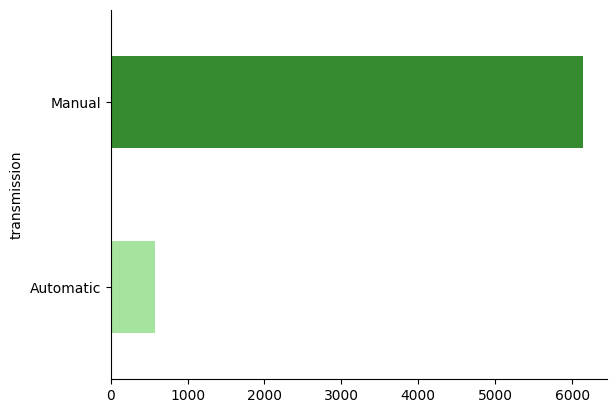

In [ ]:
# @title Zestawienie rodzajów skrzyni biegów

# Definicja niestandardowej palety kolorów
custom_palette = ['#a5e39f', '#368a2f']

# Wykres grupowany i wybór palety kolorów
data.groupby('transmission').size().plot(kind='barh', color=custom_palette)

# Ukrycie niektórych osi
plt.gca().spines[['top', 'right',]].set_visible(False)

# Wyświetlenie wykresu
plt.show()

Na podstawie powyższego wykresu można zauważyć, że znacznie większa ilość sprzedawanych samochodów, porusza się na manualnej skrzyni biegów.

Wyświetlenie który, to z kolei właściciel samochodu

In [ ]:
data['owner'].value_counts()

owner
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: count, dtype: int64

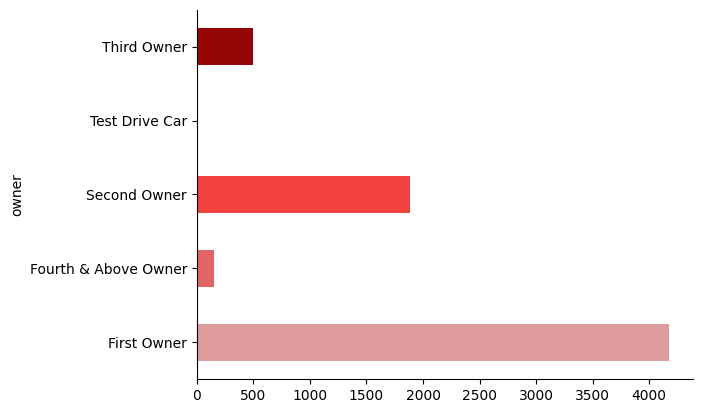

In [ ]:
# @title Zestawienie, który to właściciel

# Definicja niestandardowej palety kolorów
custom_palette = ['#de9b9b', '#e36464', '#f54040', '#cf0e0e', '#960606']

# Wykres grupowany i wybór palety kolorów
data.groupby('owner').size().plot(kind='barh', color=custom_palette)

# Ukrycie niektórych osi
plt.gca().spines[['top', 'right',]].set_visible(False)

# Wyświetlenie wykresu
plt.show()

Analizując powyższy wykres można zauwazyć, że w większości przypadków samochody są sprzedawane przez pierwszego właściciela, potem przez drugiego.

**Histogram ilości sprzedanych używanych samochodów, na przestrzeni lat**

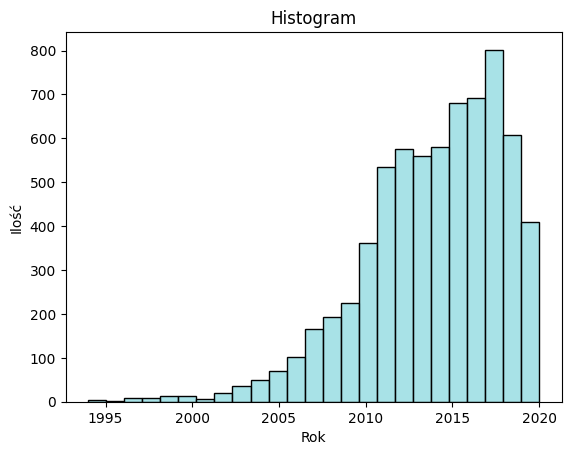

In [ ]:
# Tworzenie histogramu za pomocą Seaborn
sns.histplot(data['year'], bins=25, color='#8bd9e0', edgecolor='black')

# Dodanie tytułu i etykiet osi
plt.title('Histogram')
plt.xlabel('Rok')
plt.ylabel('Ilość')

# Wyświetlenie histogramu
plt.show()

Analizując powyższy histogram można zauważyć, że najwięcej sprzedawanych samochodów zostało wyprodukowanych w latach 2016 - 2018.

**Histogram sprzedanych samochodów w zależności od cen**







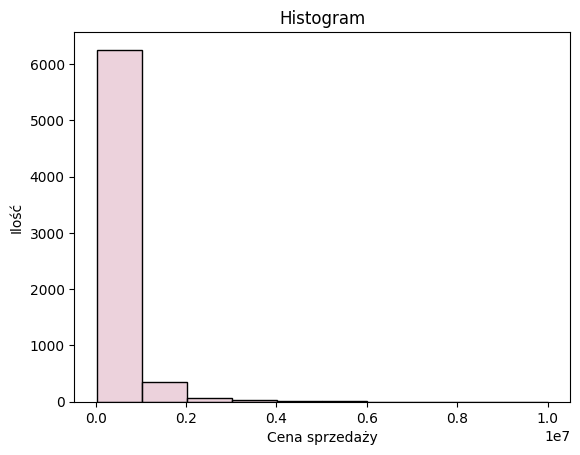

In [ ]:
# Tworzenie histogramu za pomocą Seaborn
sns.histplot(data['selling_price'], bins=10, color='#e6c3d1', edgecolor='black')

# Dodanie tytułu i etykiet osi
plt.title('Histogram')
plt.xlabel('Cena sprzedaży')
plt.ylabel('Ilość')

# Wyświetlenie histogramu
plt.show()

Na podstawie powyższego histogramu można zauważyć, że najwięcej samochodów zostało sprzedanych do kwoty 1,000,000$.

**Macierz korelacji**

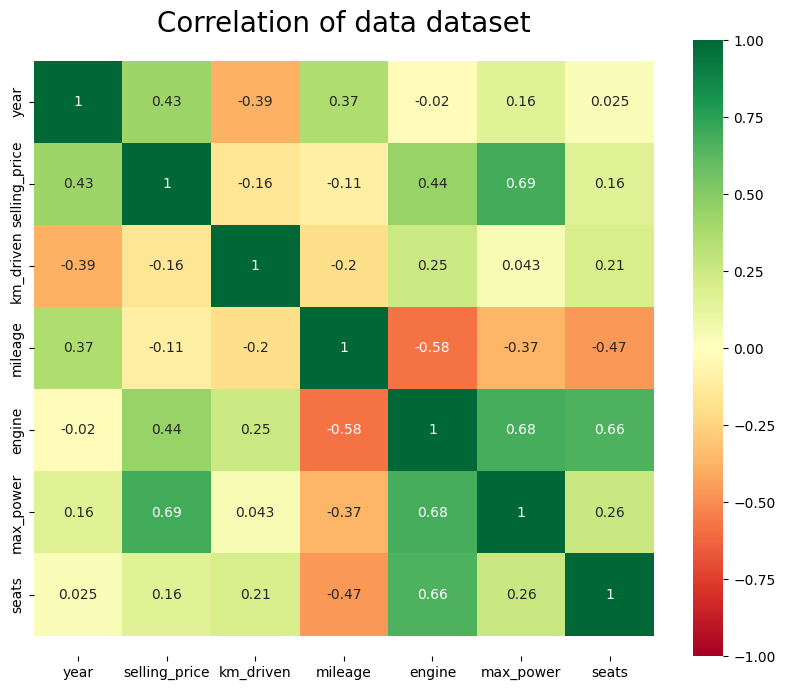

In [ ]:
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=[np.number])

ax = sns.heatmap(numerical_data.corr(),
                 xticklabels=numerical_data.corr().columns,
                 yticklabels=numerical_data.corr().columns,
                 cmap='RdYlGn',
                 vmin=-1, vmax=1,
                 annot=True, center=0)

plt.title('Correlation of data dataset', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Kodowanie kategorii**

Przykład dla **transmission**:

Funkcja pd.get_dummies() generuje nowe kolumny na podstawie kolumny "transmission", tworząc "transmission_Automatic" i "transmission_Manual".

W przypadku, gdy w danym wierszu kolumny "transmission" występuje wartość "Manual", kolumna "transmission_Manual" przyjmuje wartość True, a pozostałe kolumny przyjmują wartość False. Analogicznie dla wartości "Automatic".

Kodowanie kategorii jest istotne przy użyciu algorytmów uczenia maszynowego, które operują na danych numerycznych, a nie kategorycznych. Wykorzystując tę technikę, algorytmy mogą łatwiej przetwarzać kolumny z danymi kategorycznymi, co pozwala uzyskać lepsze wyniki.

In [ ]:
data = pd.get_dummies(data, columns=['fuel'])
data = pd.get_dummies(data, columns=['seller_type'])
data = pd.get_dummies(data, columns=['transmission'])
data = pd.get_dummies(data, columns=['owner'])

In [ ]:
# Wyświetla pierwsze 5 rekordów
data.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23,1248,74,5,False,True,...,False,True,False,False,True,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21,1498,103,5,False,True,...,False,True,False,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,17,1497,78,5,False,False,...,False,True,False,False,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23,1396,90,5,False,True,...,False,True,False,False,True,True,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,16,1298,88,5,False,False,...,False,True,False,False,True,True,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          6717 non-null   object
 1   year                          6717 non-null   int64 
 2   selling_price                 6717 non-null   int64 
 3   km_driven                     6717 non-null   int64 
 4   mileage                       6717 non-null   int64 
 5   engine                        6717 non-null   int64 
 6   max_power                     6717 non-null   int64 
 7   seats                         6717 non-null   int64 
 8   fuel_CNG                      6717 non-null   bool  
 9   fuel_Diesel                   6717 non-null   bool  
 10  fuel_LPG                      6717 non-null   bool  
 11  fuel_Petrol                   6717 non-null   bool  
 12  seller_type_Dealer            6717 non-null   bool  
 13  seller_type_Individual 

In [ ]:
# Zmiana nazw powstałych kolumn, tak aby nie zawierały spacji
data = data.rename(columns={'seller_type_Trustmark Dealer': 'seller_type_Trustmark_Dealer'})

In [ ]:
data = data.rename(columns={'owner_First Owner': 'owner_first'})

In [ ]:
data = data.rename(columns={'owner_Fourth & Above Owner': 'owner_fourth_and_above'})

In [ ]:
data = data.rename(columns={'owner_Second Owner': 'owner_second'})

In [ ]:
data = data.rename(columns={'owner_Test Drive Car': 'owner_test'})

In [ ]:
data = data.rename(columns={'owner_Third Owner': 'owner_third'})

In [ ]:
# Wyświetla ostatnie 5 rekordów
data.tail()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Automatic,transmission_Manual,owner_first,owner_fourth_and_above,owner_second,owner_test,owner_third
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18,998,67,5,False,False,...,False,True,False,False,True,False,False,True,False,False
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22,1396,88,5,False,True,...,False,True,False,False,True,False,False,True,False,False
8123,Hyundai i20 Magna,2013,320000,110000,18,1197,82,5,False,False,...,False,True,False,False,True,True,False,False,False,False
8124,Hyundai Verna CRDi SX,2007,135000,119000,16,1493,110,5,False,True,...,False,True,False,False,True,False,True,False,False,False
8125,Maruti Swift Dzire ZDi,2009,382000,120000,19,1248,73,5,False,True,...,False,True,False,False,True,True,False,False,False,False


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          6717 non-null   object
 1   year                          6717 non-null   int64 
 2   selling_price                 6717 non-null   int64 
 3   km_driven                     6717 non-null   int64 
 4   mileage                       6717 non-null   int64 
 5   engine                        6717 non-null   int64 
 6   max_power                     6717 non-null   int64 
 7   seats                         6717 non-null   int64 
 8   fuel_CNG                      6717 non-null   bool  
 9   fuel_Diesel                   6717 non-null   bool  
 10  fuel_LPG                      6717 non-null   bool  
 11  fuel_Petrol                   6717 non-null   bool  
 12  seller_type_Dealer            6717 non-null   bool  
 13  seller_type_Individual 

**Podział danych na wejściowe oraz wyjściowe**

Zmienne wejściowe:
- ilościowe: year, km_driven, mileage, engine, max_power, seats
- jakościowe: fuel_CNG, fuel_Diesel, fuel_LPG, fuel_Petrol, seller_type_Dealer, seller_type_Individual, seller_type_Trustmark_Dealer, transmission_Automatic, transmission_Manual, owner_first, owner_fourth_and_above, owner_second, owner_test, owner_third

Zmienne wyjściowe:
- selling_price (zmienna ilościowa)

In [ ]:
X = data[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark_Dealer', 'transmission_Automatic', 'transmission_Manual', 'owner_first', 'owner_fourth_and_above', 'owner_second', 'owner_test', 'owner_third']]
y = data['selling_price']

**Wyświetlenie danych przygotowanych do treningu**

In [ ]:
X

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Automatic,transmission_Manual,owner_first,owner_fourth_and_above,owner_second,owner_test,owner_third
0,2014,145500,23,1248,74,5,False,True,False,False,False,True,False,False,True,True,False,False,False,False
1,2014,120000,21,1498,103,5,False,True,False,False,False,True,False,False,True,False,False,True,False,False
2,2006,140000,17,1497,78,5,False,False,False,True,False,True,False,False,True,False,False,False,False,True
3,2010,127000,23,1396,90,5,False,True,False,False,False,True,False,False,True,True,False,False,False,False
4,2007,120000,16,1298,88,5,False,False,False,True,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,50000,18,998,67,5,False,False,False,True,False,True,False,False,True,False,False,True,False,False
8122,2014,80000,22,1396,88,5,False,True,False,False,False,True,False,False,True,False,False,True,False,False
8123,2013,110000,18,1197,82,5,False,False,False,True,False,True,False,False,True,True,False,False,False,False
8124,2007,119000,16,1493,110,5,False,True,False,False,False,True,False,False,True,False,True,False,False,False


In [ ]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 6717, dtype: int64

**Standaryzacja danych** - przekształcenia danych w taki sposób, aby ich średnia wartość wynosiła 0, a odchylenie standardowe było równe 1.
Jest to technika często stosowana w analizie danych, aby porównywać zmienne o różnych skalach i ułatwić interpretację wyników.

Jest to dwuetapowy proces:

Pierwszym krokiem jest obliczenie średnich wartości oraz odchyleń standardowych dla każdej cechy zawartej w danych treningowych (X_train) za pomocą metody fit().

Po obliczeniu średnich wartości i odchyleń standardowych dla każdej cechy w danych treningowych, dane treningowe są standaryzowane (przekształcane) poprzez przeprowadzenie transformacji za pomocą metody transform(). Ta operacja polega na odjęciu średniej od każdej wartości i podzieleniu jej przez odchylenie standardowe.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Histogram dla zmiennej wyjściowej**

<Axes: xlabel='selling_price', ylabel='Count'>

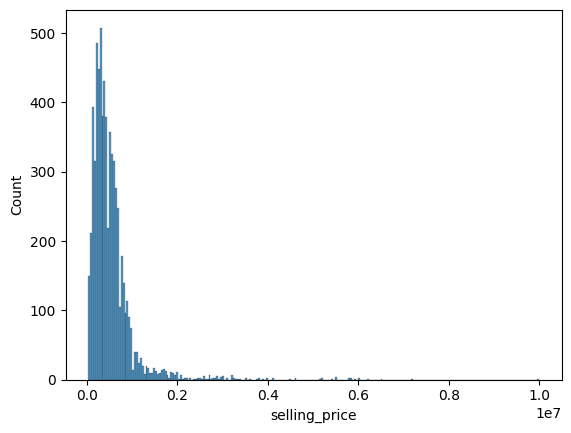

In [ ]:
sns.histplot(data['selling_price'])

Na podstawie powyższego histogramu można zauważyć, że najwięcej samochodów - około 500 - osiąga cenę około 500,000$.

**Wykres ramka-wąsy dla zmiennej wyjściowej - price**

<Axes: ylabel='selling_price'>

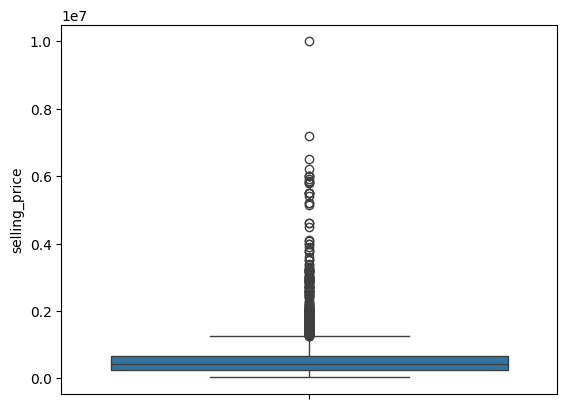

In [ ]:
sns.boxplot(y=data['selling_price'])

Analizując powyższy wykres ramka-wąsy możemy dostrzec, że ceny samochodów mają różnorodny rozkład, z kilkoma wartościami odstającymi. Wynika z tego, że większość samochodów ma ceny znacząco niższe od tych najdroższych aut.

**Jaki problem jest rozwiązywany?**

Regresja to technika prognozowania wartości zmiennej wyjściowej, na przykład ceny sprzedawanego samochodu, opierając się na danych wejściowych. Wynik jest liczbą.

W przypadku klasyfikacji, model przewiduje dyskretne etykiety, na przykład, czy dany e-mail jest spamem czy nie. Wynik należy do określonej klasy lub kategorii.

W segmentacji, nie prognozujemy konkretnych wartości, ani nie przypisujemy etykiet, ale raczej grupujemy dane na podstawie ich podobieństwa, aby zidentyfikować różne segmenty w zbiorze danych. Na przykład, w przypadku marketingu, segmentacja może pomóc w identyfikacji różnych grup klientów o podobnych zachowaniach lub preferencjach.

**Określenie rozwiązywanego problemu.**

Rozwiązywany problem to **regresja**. Naszym celem jest przewidywanie cen samochodów na podstawie różnych cech, takich jak rok produkcji, przebieg, spalanie, pojemność silnika, maksymalna moc, liczba miejsc itp.

W regresji staramy się znaleźć zależność między zmiennymi niezależnymi (cechami samochodu) a zmienną zależną (cena sprzedaży), aby prognozować numeryczną wartość, czyli cenę samochodu. Analizując dane dotyczące pojazdów, regresja ma pomóc zrozumieć, w jaki sposób poszczególne cechy wpływają na cenę samochodu i umożliwić przewidywanie cen dla nowych danych.

**Podział na zbiór uczący oraz zbiór testujący.**

Dane podzielone na zbiór treningowy(uczący) i testujący.
Podział danych na zbiory pomaga w ocenie skuteczności modelu predykcyjnego.

Zbiory:
- Treningowy: stosowany do uczenia modelu, proces ten polega na dostosowywaniu modelu do danych treningowych, aby zrozumiał zależności między cechami a wynikami.
- Testowy: wykorzystywany do oceny efektywności modelu po jego wytrenowaniu. Te dane nie są używane podczas treningu, ale są wdrażane do sprawdzenia, jak precyzyjnie model potrafi przewidywać wartości na nowych danych, które nie były wcześniej używane.

Podział danych na dwa zbiory pomaga uniknąć nadmiernego dopasowania modelu do danych treningowych (overfitting). Zbiór testowy pozwala ocenić, jak dobrze model radzi sobie z nowymi danymi, co jest istotne dla jego skuteczności w rzeczywistości.

In [ ]:
# Dane zostały podzielone przy użyciu funkcji train_test_split.
# Parametr test_size=0.25 oznacza, że 25% danych zostało przeznaczone do zbioru testowego, a 75% danych do zbioru uczącego.
# Parametr random_state=42 gwarantuje deterministyczny podział danych - podział będzie taki sam przy każdym uruchomieniu kodu, ułatwiając porównanie wyników.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # random state - kod deterministyczny

**<h2>3.	Opis zastosowanych sieci neuronowych.</h2>**

1. **Typ sieci**: Feedforward (jednokierunkowa) sieć neuronowa używana do regresji.

2. **Architektura sieci**: Zbudowano 5 różnych architektur sieci neuronowych, z różną liczbą warstw i neuronów w każdej z nich, wszystkie oparte na warstwach gęstych.

3. **Ilość epok uczenia**: Każdy model uczony przez 100 epok.

4. **Sposób uczenia sieci**: Na początku tworzony jest zestaw modeli o różnych architekturach sieci neuronowej. Uczony jest za pomocą optymalizatora Adam, który dostosowuje wagi sieci w celu minimalizacji funkcji błędu średniokwadratowego (MSE). Funkcja błędu używana do treningu to MSE (Mean Squared Error), a jako metruka oceny stosowane są także MAE (Mean Absolute Error) i R2 Score. Każdy model trenowany jest na danych treningowych przez 100 epok z rozmiarem paczki (batch size) 32, a 20% danych treningowych używanych jest jako zbiór walidacyjny. Po treningu każdy model oceniany jest na zbiorze treningowym i testowym. Wyniki predykcji dla zbioru testowego są wizualizowane za pomocą wykresu punktowego, gdzie osie reprezentują rzeczywiste i przewidywane wartości. Idealny model powinien być linią prostą.

5. **Framework**: Keras, część biblioteki TensorFlow, używany do budowy i trenowania sieci neuronowych.

In [ ]:
models = []

Kod zawiera 5 zróżnicowanych architektur sieci neuronowych (model1, model2, model3, model4 i model5). Każdy model jest zbudowany z warstw gęstych (Dense) i może zawierać różną liczbę neuronów oraz techniki regularyzacji, np. Dropout.

Sieci neuronowe różnią się od siebie liczbą warstw i liczbą neuronów w każdej z tych warstw.

**model 1**
- typ: **Sequential** - warstwy są układane jedna po drugiej w sekwencji
- ilość warstw gęstych: **5**

Pierwsza, druga, trzecia i czwarta warstwa mają po **64 neurony i aktywację ReLU** (zastosowana funkcja nieliniowa Rectified Linear Unit) na swoich wyjściach.

Piąta warstwa zawiera tylko **1 neuron**, co wskazuje, że model przewiduje pojedynczą wartość wyjściową, bez jakiejkolwiek aktywacji.

In [ ]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
models.append(model1)

**model 2**
- typ: **Sequential**
- ilość warstw gęstych: **3**

Pierwsza i druga warstwa mają po **64 neurony i aktywację ReLU** (zastosowana funkcja nieliniowa Rectified Linear Unit) na swoich wyjściach.

Trzecia warstwa zawiera **1 neuron**, bez jakiejkolwiek aktywacji.

In [ ]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
models.append(model2)

**model 3**
- typ: **Sequential**
- ilość warstw gęstych: **3**

Pierwsza i druga warstwa mają po **64 neurony i aktywację ReLU** (zastosowana funkcja nieliniowa Rectified Linear Unit) na swoich wyjściach.

Trzecia warstwa jest warstwą **dropout z wartością 0.2** - losowo wyłącza **20%** neuronów w czasie treningu w celu zapobiegania nadmiernemu dopasowaniu (**overfitting**).

Ostatnia warstwa zawiera **1 neuron**, bez jakiejkolwiek aktywacji.

In [ ]:
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
models.append(model3)

**model 4**
- typ: **Sequential**
- ilość warstw gęstych: **4**

Pierwsza, druga i trzecia warstwa mają po **128 neuronów i aktywację ReLU** (zastosowana funkcja nieliniowa Rectified Linear Unit) na swoich wyjściach.

Czwarta warstwa zawiera **1 neuron**, bez jakiejkolwiek aktywacji.

In [ ]:
model4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
models.append(model4)

**model 5**
- typ: **Sequential**
- ilość warstw gęstych: **5**

Pierwsza i trzecia warstwa mają po **64 neurony i aktywację ReLU** (zastosowana funkcja nieliniowa Rectified Linear Unit) na swoich wyjściach.

Druga i czwarta warstwa mają po **128 neuronów i aktywację ReLU**.

Piąta warstwa zawiera **1 neuron**, bez jakiejkolwiek aktywacji.

In [ ]:
model5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
models.append(model5)

Dla każdego z modeli następuje kolejno: kompilacja, trenowanie, ocenienie i output wyników:

Model 1
53/53 [==============================] - 0s 2ms/step

DANE TRENINGOWE(UCZĄCE):
Średnia wartość bezwzględna róznicy - MAE 104271.21875
Średnia wartość kwadratu różnicy - MSE: 34623066112.0
Średni błąd modelu - RMSE: 186072.74414056455
Współczynnik determinacji - R2: 0.8789231030309836

DANE TESTUJĄCE:
Średnia wartość bezwzględna róznicy - MAE 112300.6875
Średnia wartość kwadratu różnicy - MSE: 43266785280.0
Średni błąd modelu - RMSE: 208006.6952768588
Współczynnik determinacji - R2: 0.8184762509152813


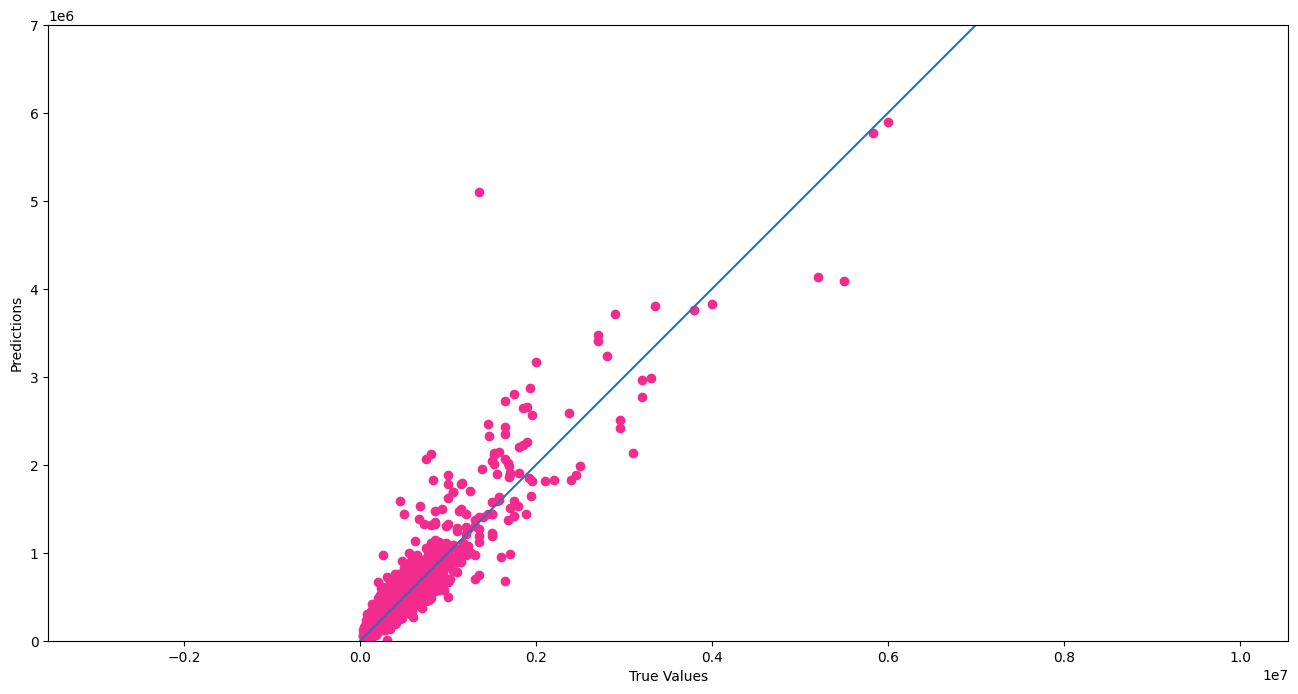

Model 2
53/53 [==============================] - 0s 1ms/step

DANE TRENINGOWE(UCZĄCE):
Średnia wartość bezwzględna róznicy - MAE 151185.53125
Średnia wartość kwadratu różnicy - MSE: 78720253952.0
Średni błąd modelu - RMSE: 280571.29923069465
Współczynnik determinacji - R2: 0.7247151339601677

DANE TESTUJĄCE:
Średnia wartość bezwzględna róznicy - MAE 154560.375
Średnia wartość kwadratu różnicy - MSE: 66458505216.0
Średni błąd modelu - RMSE: 257795.47167473676
Współczynnik determinacji - R2: 0.7211764716916811


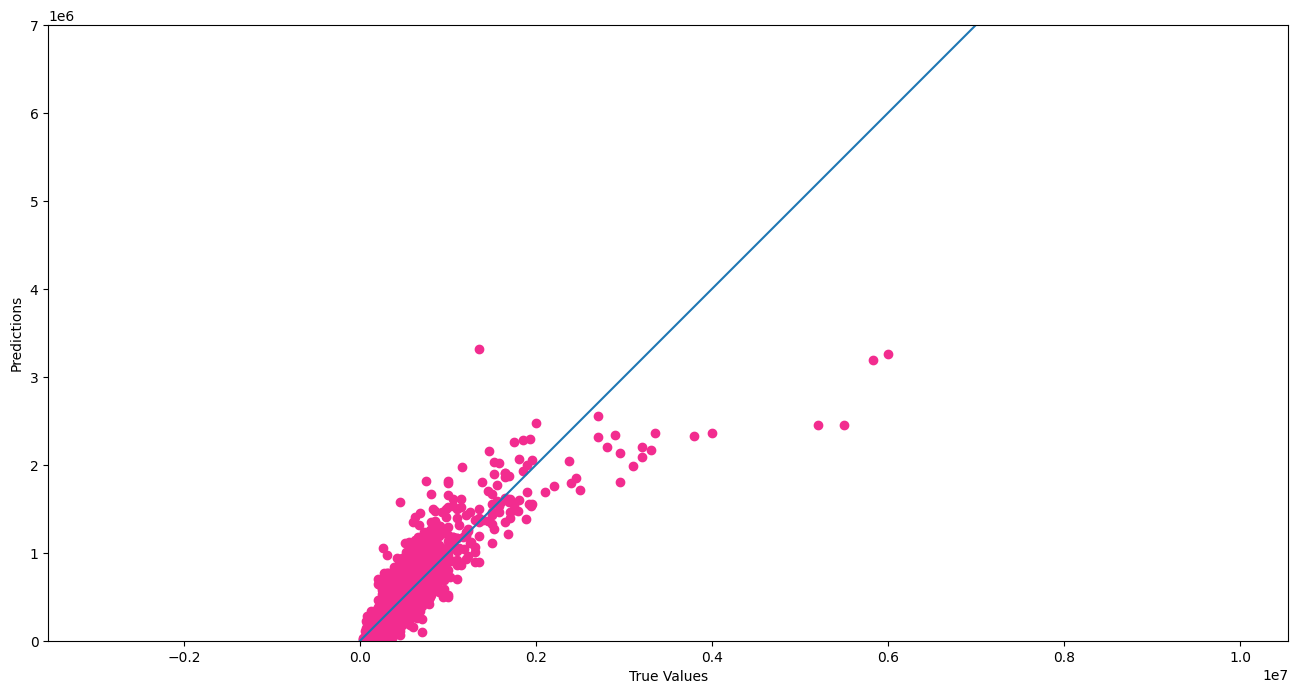

Model 3
53/53 [==============================] - 0s 1ms/step

DANE TRENINGOWE(UCZĄCE):
Średnia wartość bezwzględna róznicy - MAE 145111.5
Średnia wartość kwadratu różnicy - MSE: 80130293760.0
Średni błąd modelu - RMSE: 283072.9477714181
Współczynnik determinacji - R2: 0.7197841310211843

DANE TESTUJĄCE:
Średnia wartość bezwzględna róznicy - MAE 147598.5625
Średnia wartość kwadratu różnicy - MSE: 62966120448.0
Średni błąd modelu - RMSE: 250930.50920125277
Współczynnik determinacji - R2: 0.7358286010268236


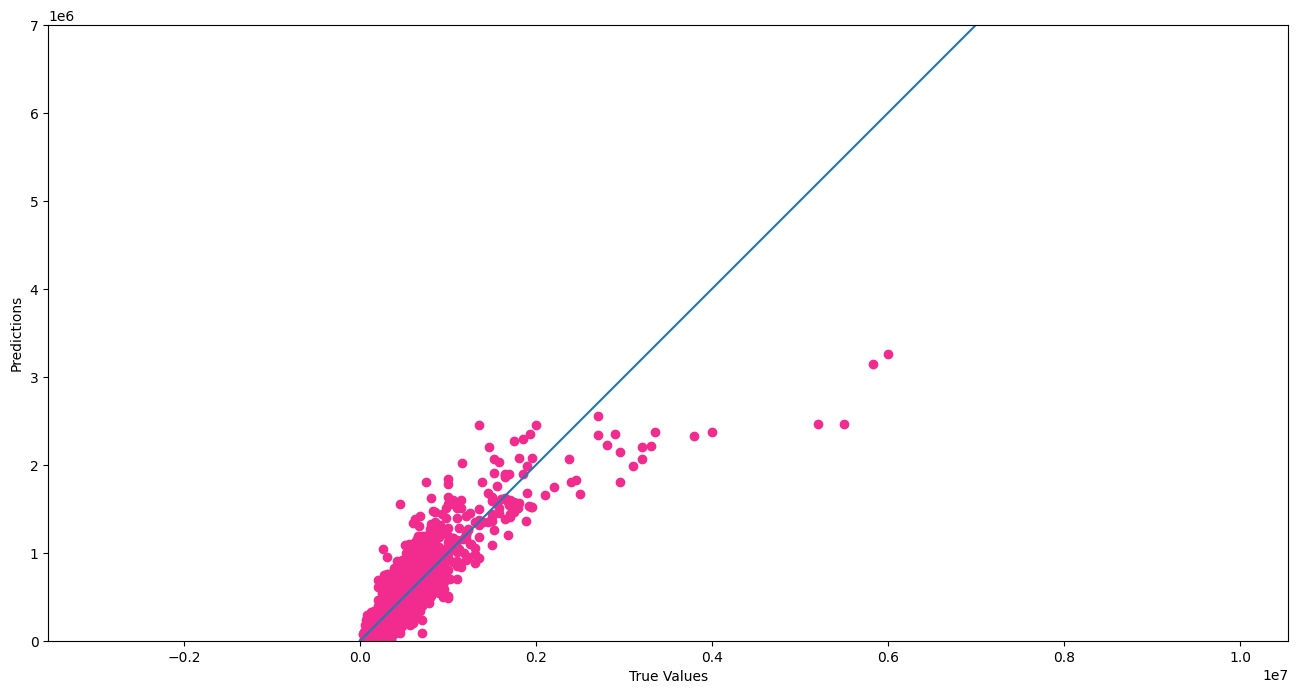

Model 4
53/53 [==============================] - 0s 2ms/step

DANE TRENINGOWE(UCZĄCE):
Średnia wartość bezwzględna róznicy - MAE 108067.15625
Średnia wartość kwadratu różnicy - MSE: 37982777344.0
Średni błąd modelu - RMSE: 194891.70670913628
Współczynnik determinacji - R2: 0.8671742028108762

DANE TESTUJĄCE:
Średnia wartość bezwzględna róznicy - MAE 111360.609375
Średnia wartość kwadratu różnicy - MSE: 39877361664.0
Średni błąd modelu - RMSE: 199693.16879653145
Współczynnik determinacji - R2: 0.8326964379903348


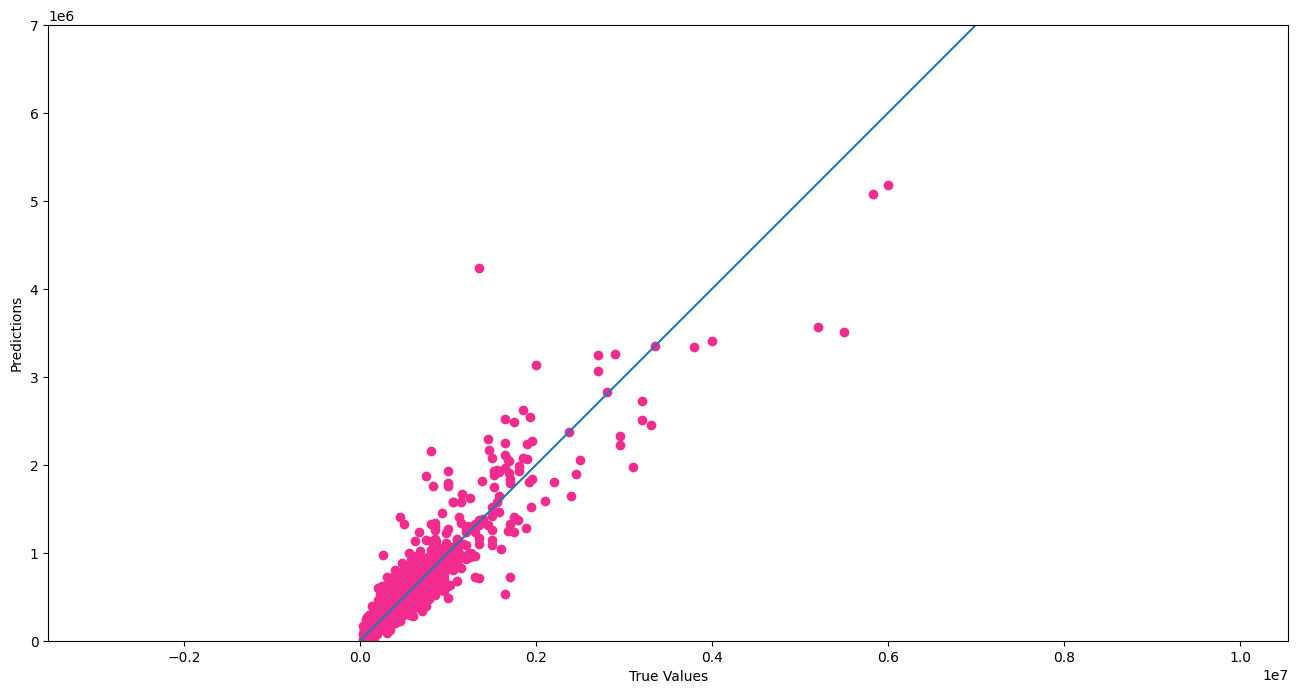

Model 5
53/53 [==============================] - 0s 2ms/step

DANE TRENINGOWE(UCZĄCE):
Średnia wartość bezwzględna róznicy - MAE 102303.7421875
Średnia wartość kwadratu różnicy - MSE: 32672886784.0
Średni błąd modelu - RMSE: 180756.42944028298
Współczynnik determinacji - R2: 0.8857428780129143

DANE TESTUJĄCE:
Średnia wartość bezwzględna róznicy - MAE 108998.3203125
Średnia wartość kwadratu różnicy - MSE: 36449894400.0
Średni błąd modelu - RMSE: 190918.55436284866
Współczynnik determinacji - R2: 0.8470762069183


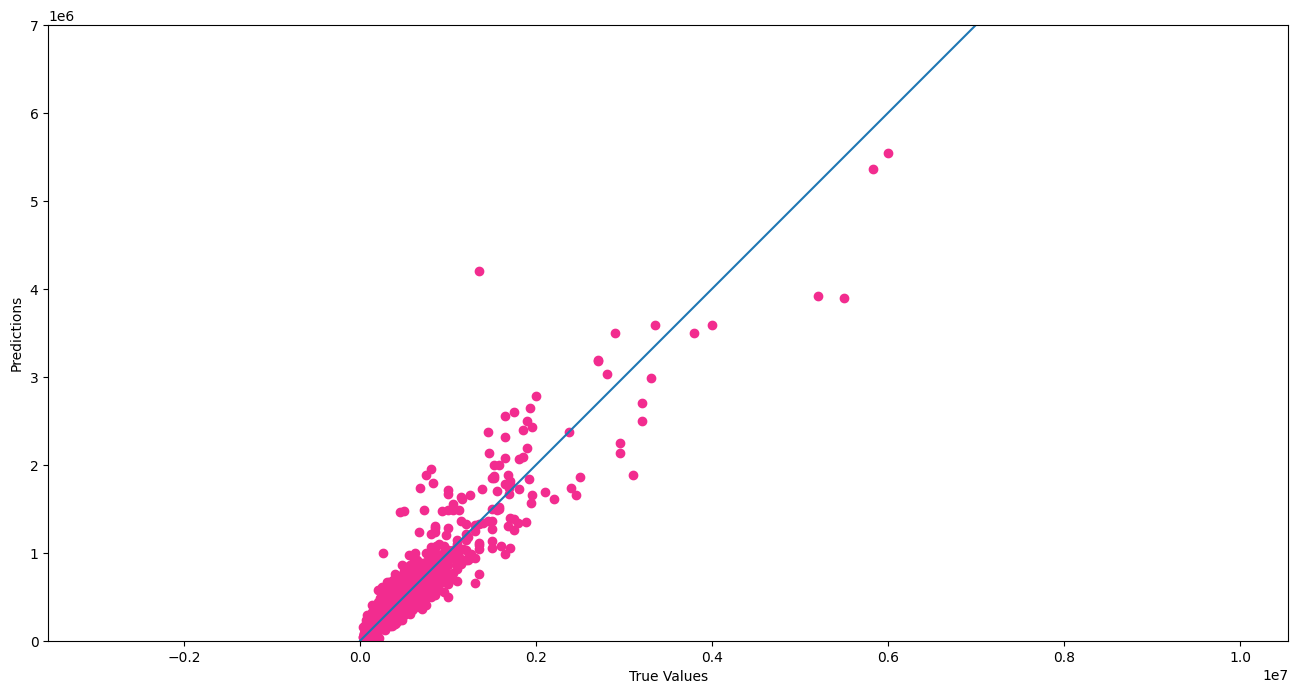

In [ ]:
for i, model in enumerate(models, start=1):
    print(f'Model {i}')

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.15, verbose=0)
    loss_train, mae_train = model.evaluate(X_train, y_train, verbose=0)
    loss_test, mae_test = model.evaluate(X_test, y_test, verbose=0)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("\nDANE TRENINGOWE(UCZĄCE):")
    print('Średnia wartość bezwzględna róznicy - MAE', mae_train)
    print('Średnia wartość kwadratu różnicy - MSE:', loss_train)
    print('Średni błąd modelu - RMSE:', np.sqrt(loss_train))
    print('Współczynnik determinacji - R2:', r2_score(y_train, y_pred_train))

    print("\nDANE TESTUJĄCE:")
    print('Średnia wartość bezwzględna róznicy - MAE', mae_test)
    print('Średnia wartość kwadratu różnicy - MSE:', loss_test)
    print('Średni błąd modelu - RMSE:', np.sqrt(loss_test))
    print('Współczynnik determinacji - R2:', r2_score(y_test, y_pred_test))

    plt.figure(figsize=(16, 8))
    plt.scatter(y_test, y_pred_test, color='#f22c8f')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.xlim(0, 7000000)
    plt.ylim(0, 7000000)
    _ = plt.plot([0, 7000000], [0, 7000000])
    plt.show()

**<h2>4.	Dyskusja wyników oraz wnioski.</h2>**

**Zebrane w tabeli wyniki sieci z podziałem na zbiór treningowy (uczący) i testowy.**

Saving wyniki.jpg to wyniki.jpg


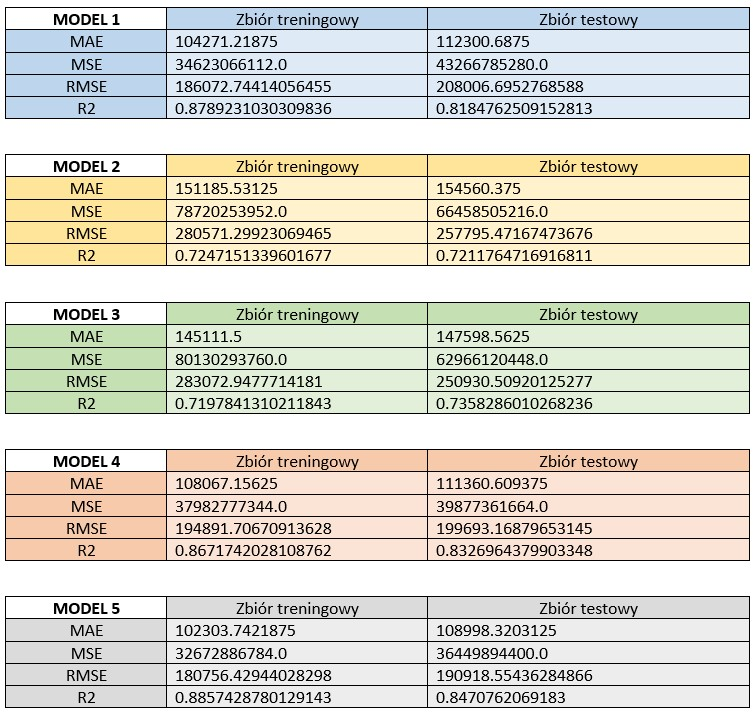

In [ ]:
uploaded = files.upload()

# Wyświetlenie wczytanego obrazka
Image.open(list(uploaded.keys())[0])

Model 1 wykazuje niższe błędy (MAE, MSE, RMSE) zarówno na zbiorze treningowym, jak i testowym w porównaniu do Modelu 2 i Modelu 3, a także osiąga wyższy współczynnik determinacji (R2) na obu zbiorach. Wydaje się być bardziej skuteczny w przewidywaniu wartości wyjściowych.

Model 2 i Model 3 prezentują podobne wyniki, jednak Model 3 wykazuje minimalną poprawę w błędach i podobieństwo we współczynniku determinacji (R2) w porównaniu do Modelu 2, co sugeruje jego nieznacznie lepszą wydajność.

Model 4 uzyskuje niższe błędy i wyższy współczynnik determinacji (R2) niż modele 2 i 3 na obu zbiorach. Może to sugerować, że Model 4 jest bardziej skuteczny w generalizacji na nowych danych niż modele 2 i 3.

Model 5 wykazuje najlepsze wyniki spośród wszystkich modeli, osiągając najniższe błędy i najwyższy współczynnik determinacji (R2) zarówno na zbiorze treningowym, jak i testowym. Wydaje się być najbardziej obiecujący w kontekście skuteczności predykcyjnej.

**Wybrane miary:**
- MAE (Mean Absolute Error) - oferuje nam średnią wartość różnicy bezwzględnej między przewidywanymi a rzeczywistymi wartościami. To narzędzie jest nie tylko proste w zastosowaniu, ale także łatwe do zrozumienia, dostarczając klarownego obrazu typowych błędów modelu.
- MSE (Mean Squared Error) - pozwala na lepsze zrozumienie rozkładu błędów oraz ich wpływu na jakość modelu.
- RMSE (Root Mean Squared Error) - pozwala lepiej zrozumieć, w jakim stopniu błędy modelu są rozproszone w oryginalnych jednostkach danych. Dzięki temu łatwiej jest zinterpretować, jak te błędy wpływają na rzeczywiste wartości danych.
- R2 Score - współczynnik determinacji, używany do oceny dopasowania modelu do danych. Informuje, jak duża część zmienności w danych jest wyjaśniona przez model. Wysoki wynik R2 sugeruje, że model skutecznie odzwierciedla zmienność danych, co jest istotne w ocenie jakości modelu.


**Czy wyniki są satysfakcjonujące? Wnioski.**

Model 5 jest najbardziej obiecujący, prezentując najniższe błędy oraz najwyższy współczynnik determinacji na obu zbiorach danych.

Modele 1, 4 i 5 osiągają lepsze wyniki niż modele 2 i 3 zarówno na zbiorze treningowym, jak i testowym, wykazując niższe błędy (MAE, MSE, RMSE) oraz wyższy współczynnik determinacji (R2).

Wartość współczynnika determinacji (R2) dla wszystkich modeli utrzymuje się na poziomie około 0,80 - modele potrafią uchwycić około 80% zróżnicowania danych.

Wyniki są w miarę satysfakcjonujące, ale mogłyby być lepsze - w tym celu należałoby kontynuować testowanie modeli.









**Dalsze propozycje rozwoju projektu.**
1. Optymalizacja architektury sieci neuronowej - dodając lub usuwając warstwy, zmieniając liczbę neuronów w warstwach, stosując techniki regularyzacji (np. dropout) lub używając różnych funkcji aktywacji.

2. Zastosowanie zaawansowanych modeli - bardziej zaawansowane modele uczenia maszynowego, takie jak modele ensemble (np. Random Forest, Gradient Boosting) lub głębokie sieci neuronowe, mogą osiągnąć lepsze wyniki niż modele liniowe.

3. Badanie dodatkowych zmiennych, które mają potencjał poprawy dokładności prognoz.